Ana Karen Zetter Márquez
A01637124

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [309]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

In [310]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [311]:
# Define the col names for the iris dataset
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
df = pd.read_csv(url, header=None, names=columns)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [312]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [313]:
df.shape

(150, 5)

Dataset está balanceado porque tiene la misma cantidad de datos en los 3 grupos (50,50 y 50)

In [314]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Drop rows with any missing values


In [315]:
#No missing values
df.isnull().sum()

,0
SepalLength,0
SepalWidth,0
PetalLength,0
PetalWidth,0
Species,0


3. Encoding the class label categorical column: from string to num


In [316]:
#Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
encoding = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
df['Species'] = df['Species'].replace(encoding)

#Visualize the dataset
df

<ipython-input-316-510f84ce2936>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace(encoding)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [317]:
# If necesary, drop out non necesary columns
#No unnecesssary columns

5. Scatter plot of the data

Necesitamos 6 scatter plots, porque hay 4 variables

Text(0, 0.5, 'PetalWidth')

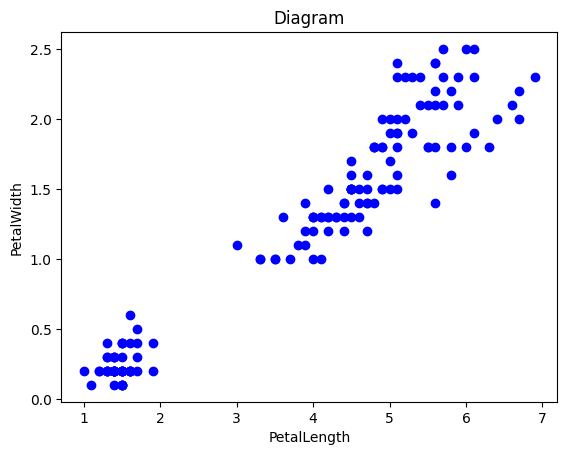

In [318]:
#Dispersion diagram
plt.scatter(df['PetalLength'], df['PetalWidth'], color='blue')
plt.title('Diagram')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

Text(0, 0.5, 'SepalLength')

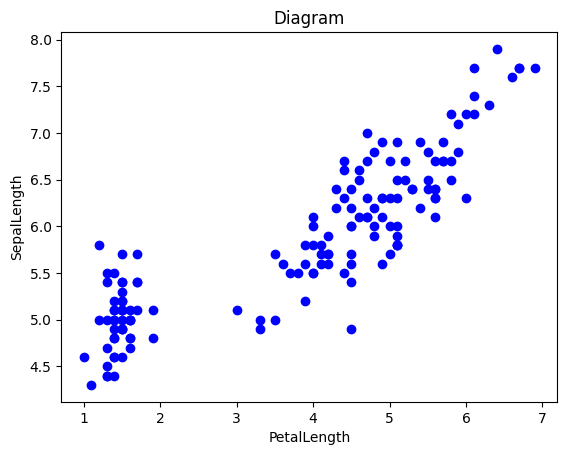

In [319]:
#Dispersion diagram
plt.scatter(df['PetalLength'], df['SepalLength'], color='blue')
plt.title('Diagram')
plt.xlabel('PetalLength')
plt.ylabel('SepalLength')

Text(0, 0.5, 'SepalWidth')

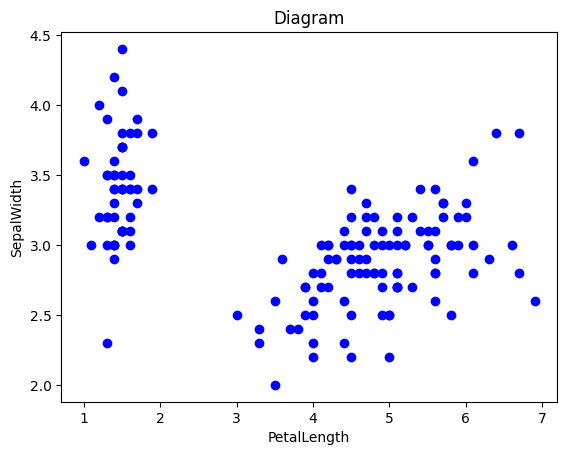

In [320]:
#Dispersion diagram
plt.scatter(df['PetalLength'], df['SepalWidth'], color='blue')
plt.title('Diagram')
plt.xlabel('PetalLength')
plt.ylabel('SepalWidth')

Text(0, 0.5, 'SepalLength')

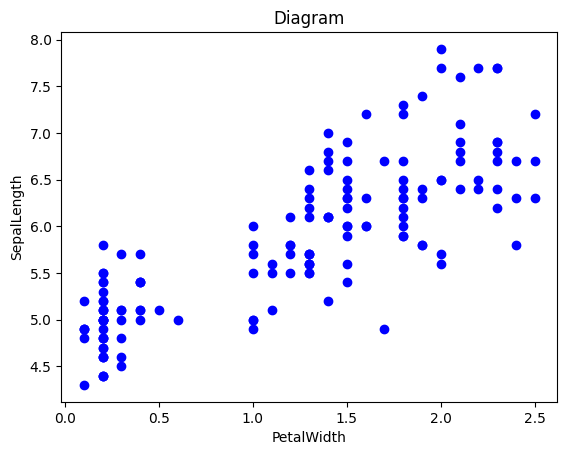

In [321]:
#Dispersion diagram
plt.scatter(df['PetalWidth'], df['SepalLength'], color='blue')
plt.title('Diagram')
plt.xlabel('PetalWidth')
plt.ylabel('SepalLength')

Text(0, 0.5, 'SepalWidth')

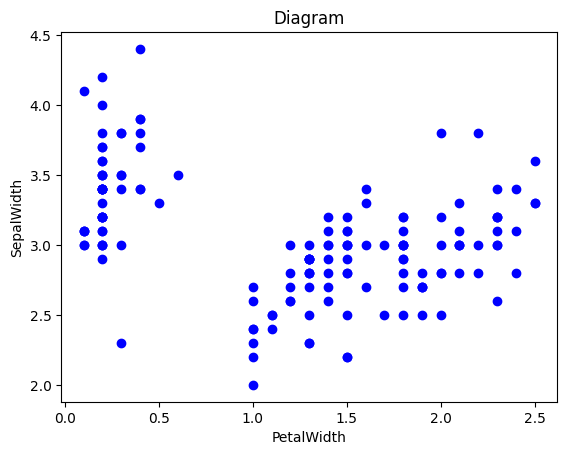

In [322]:
#Dispersion diagram
plt.scatter(df['PetalWidth'], df['SepalWidth'], color='blue')
plt.title('Diagram')
plt.xlabel('PetalWidth')
plt.ylabel('SepalWidth')

Text(0, 0.5, 'SepalWidth')

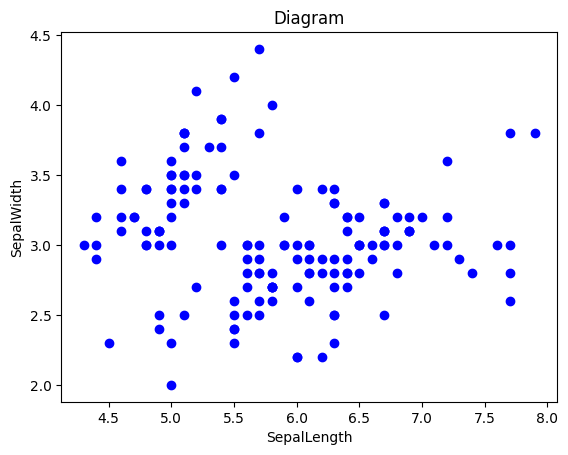

In [323]:
#Dispersion diagram
plt.scatter(df['SepalLength'], df['SepalWidth'], color='blue')
plt.title('Diagram')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

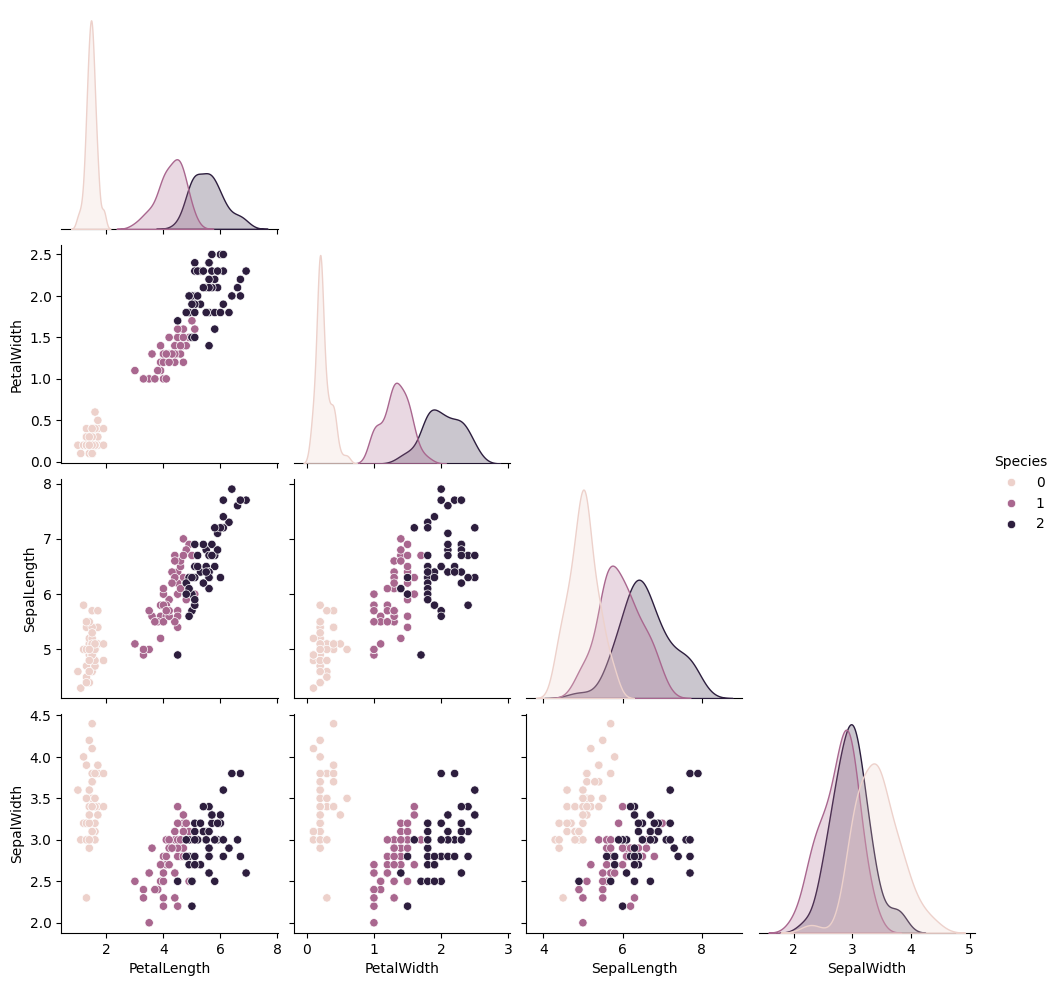

In [324]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df, vars=["PetalLength", "PetalWidth", "SepalLength", "SepalWidth"], hue = "Species",corner=True)
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

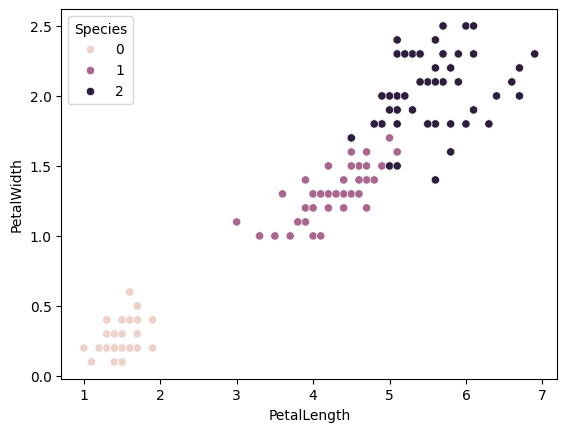

In [325]:
sns.scatterplot(data=df, x='PetalLength', y='PetalWidth', hue = 'Species')

In [326]:
# Get dataframes for each real cluster
df0_setosa= df[df['Species'] == 0]
df1_versicolor= df[df['Species'] == 1]
df2_virginica= df[df['Species'] == 2]
print(df0_setosa)
print(df1_versicolor)
print(df2_virginica)

    SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0           5.1         3.5          1.4         0.2        0
1           4.9         3.0          1.4         0.2        0
2           4.7         3.2          1.3         0.2        0
3           4.6         3.1          1.5         0.2        0
4           5.0         3.6          1.4         0.2        0
5           5.4         3.9          1.7         0.4        0
6           4.6         3.4          1.4         0.3        0
7           5.0         3.4          1.5         0.2        0
8           4.4         2.9          1.4         0.2        0
9           4.9         3.1          1.5         0.1        0
10          5.4         3.7          1.5         0.2        0
11          4.8         3.4          1.6         0.2        0
12          4.8         3.0          1.4         0.1        0
13          4.3         3.0          1.1         0.1        0
14          5.8         4.0          1.2         0.2        0
15      

Recall that for this dataset we know in advance the class to which each point belongs to

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

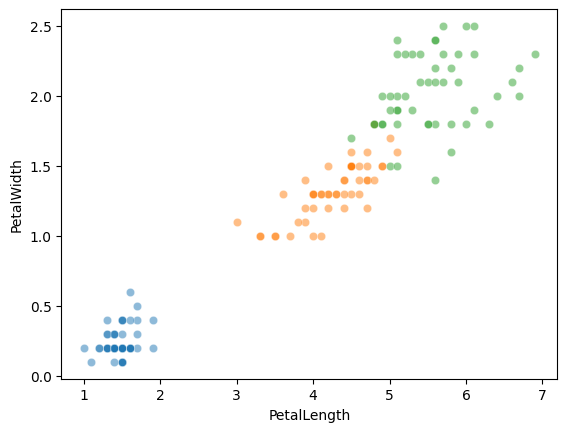

In [327]:
# Scatter plot of each real cluster for Petal
sns.scatterplot(data=df0_setosa, x='PetalLength', y='PetalWidth', alpha = 0.5)
sns.scatterplot(data=df1_versicolor, x='PetalLength', y='PetalWidth', alpha = 0.5)
sns.scatterplot(data=df2_virginica, x='PetalLength', y='PetalWidth', alpha = 0.5)

# Kmeans clustering

Kmeans clustering

In [328]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
cluster_num = 2

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=cluster_num, random_state=42, n_init=10)

# Print estimated cluster of each point in the dataset
estimated = kmeans.fit_predict(df[['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth']])
estimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [329]:
# Add a new column to the dataset with the cluster information
df["ClusterInfo"] = estimated
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ClusterInfo
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [330]:
# Manual pairing the labels of the real and estimated clusters
df[['Species', 'ClusterInfo']]

,Species,ClusterInfo
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,0
146,2,0
147,2,0
148,2,0


In [331]:
# Label of the estimated clusters
# 0 -> Setosa / 1 -> Versicolor / 2 -> Virginica
df['ClusterInfo'] = df['ClusterInfo'].map({0:1, 1:0, 2:2})
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ClusterInfo
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [332]:
# Cluster centroides
centroides = kmeans.cluster_centers_
centroides

array([[4.95876289, 1.69587629, 6.30103093, 2.88659794],
       [1.56226415, 0.28867925, 5.00566038, 3.36037736]])

In [333]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(sse)

152.36870647733915


In [334]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(iterations)

2


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters (K=2)

Plot estimated clusters

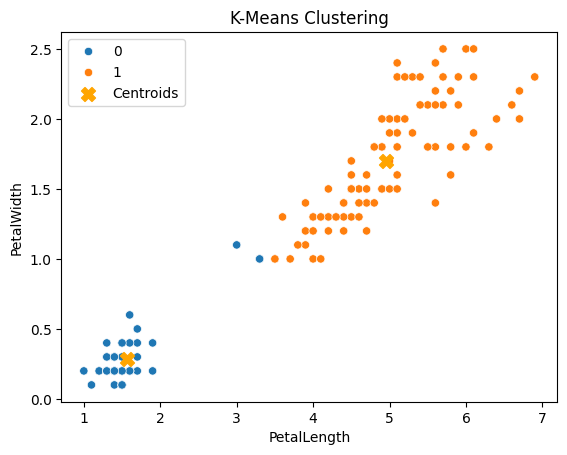

In [335]:
sns.scatterplot(x='PetalLength', y='PetalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='orange', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

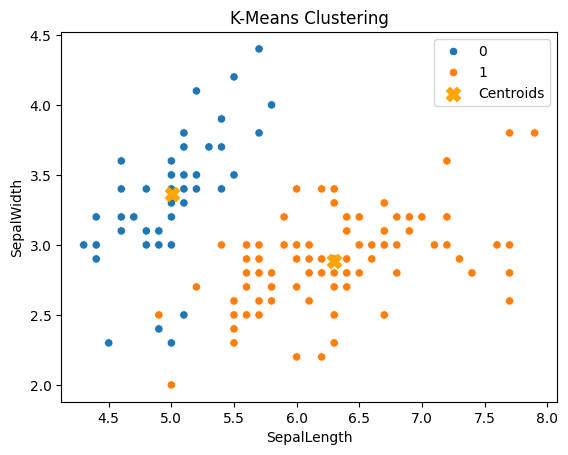

In [336]:
sns.scatterplot(x='SepalLength', y='SepalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 2], centroides[:, 3], s=100, c='orange', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

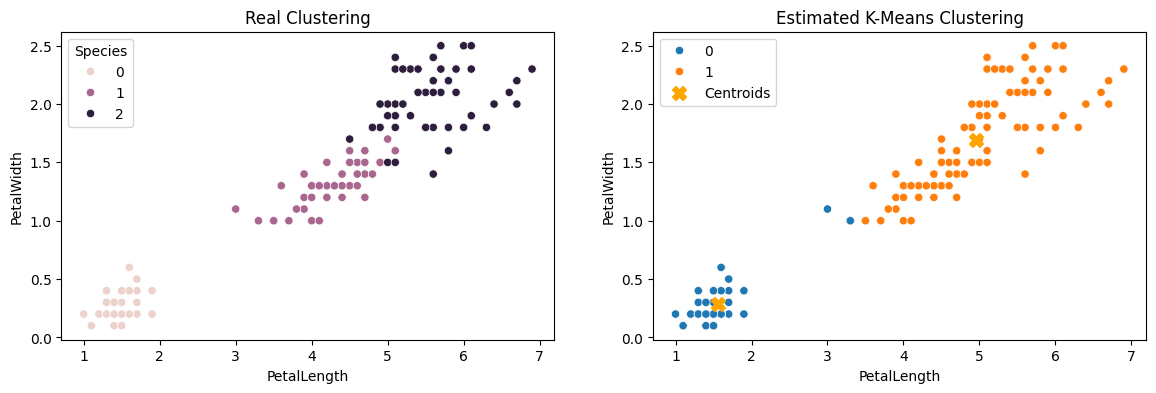

In [337]:
#Definir tamaños
plt.figure(figsize=(14, 4))

#Real cluster
plt.subplot(1, 2, 1)
plt.title('Real Clustering')
sns.scatterplot(data=df, x='PetalLength', y='PetalWidth', hue = 'Species')

#Estimated cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='PetalLength', y='PetalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='orange', marker='X', label='Centroids')
plt.title('Estimated K-Means Clustering')
plt.legend()
plt.show()

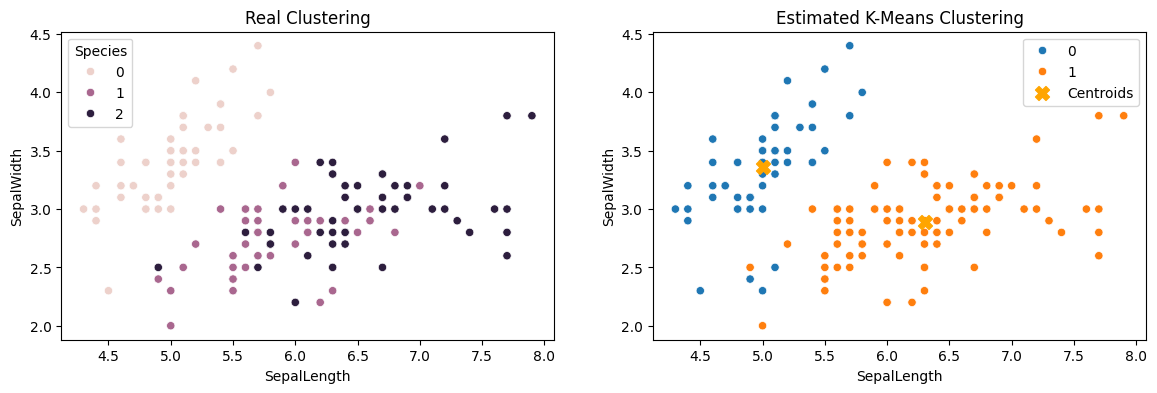

In [338]:
#Definir tamaños
plt.figure(figsize=(14, 4))

#Real cluster
plt.subplot(1, 2, 1)
plt.title('Real Clustering')
sns.scatterplot(data=df, x='SepalLength', y='SepalWidth', hue = 'Species')

#Estimated cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='SepalLength', y='SepalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 2], centroides[:, 3], s=100, c='orange', marker='X', label='Centroids')
plt.title('Estimated K-Means Clustering')
plt.legend()
plt.show()

# Kmeans clustering (K=3)

Kmeans clustering

In [339]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
cluster_num = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=cluster_num, random_state=42, n_init=10)

# Print estimated cluster of each point in the dataset
estimated = kmeans.fit_predict(df[['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth']])
estimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [340]:
# Add a new column to the dataset with the cluster information
df["ClusterInfo"] = estimated
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ClusterInfo
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [341]:
# Manual pairing the labels of the real and estimated clusters
df[['Species', 'ClusterInfo']]

,Species,ClusterInfo
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,2
146,2,0
147,2,2
148,2,2


In [342]:
# Label of the estimated clusters
# 0 -> Setosa / 1 -> Versicolor / 2 -> Virginica
df['ClusterInfo'] = df['ClusterInfo'].map({0:1, 1:0, 2:2})
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ClusterInfo
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [343]:
# Cluster centroides
centroides = kmeans.cluster_centers_
centroides

array([[4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

In [344]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(sse)

78.94084142614601


In [345]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(iterations)

4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

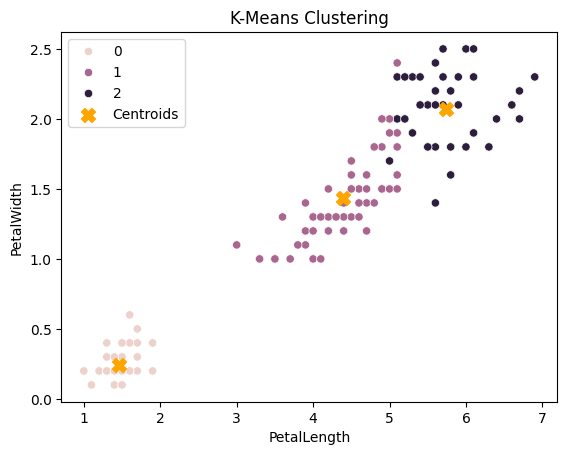

In [346]:
sns.scatterplot(x='PetalLength', y='PetalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='orange', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

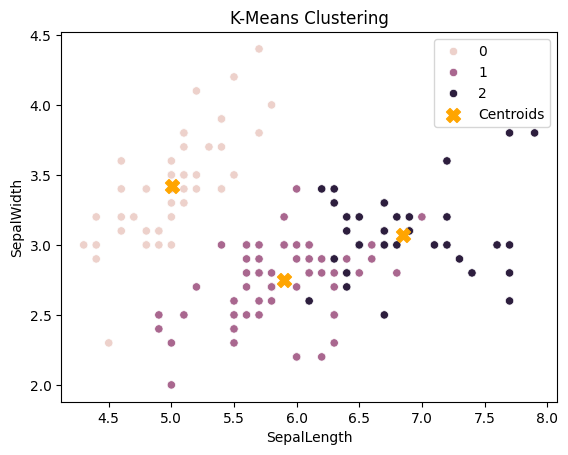

In [347]:
sns.scatterplot(x='SepalLength', y='SepalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 2], centroides[:, 3], s=100, c='orange', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

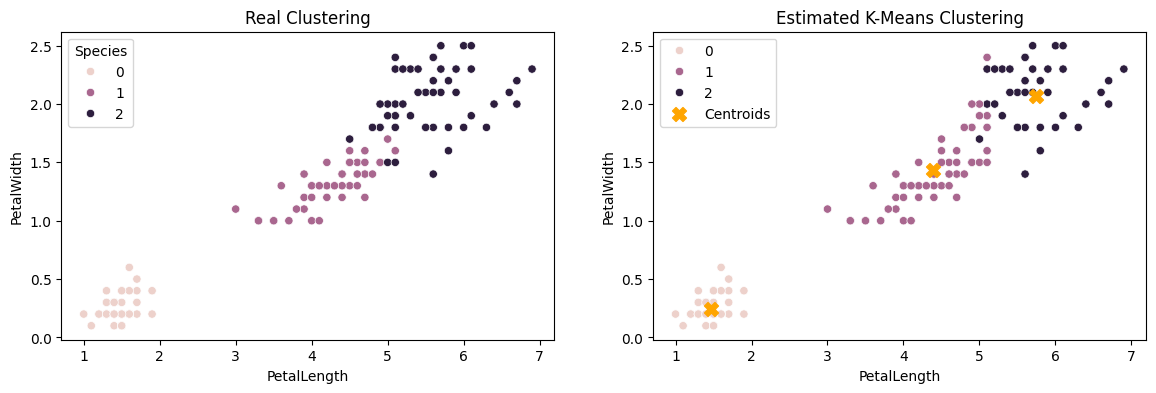

In [348]:
#Definir tamaños
plt.figure(figsize=(14, 4))

#Real cluster
plt.subplot(1, 2, 1)
plt.title('Real Clustering')
sns.scatterplot(data=df, x='PetalLength', y='PetalWidth', hue = 'Species')

#Estimated cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='PetalLength', y='PetalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='orange', marker='X', label='Centroids')
plt.title('Estimated K-Means Clustering')
plt.legend()
plt.show()

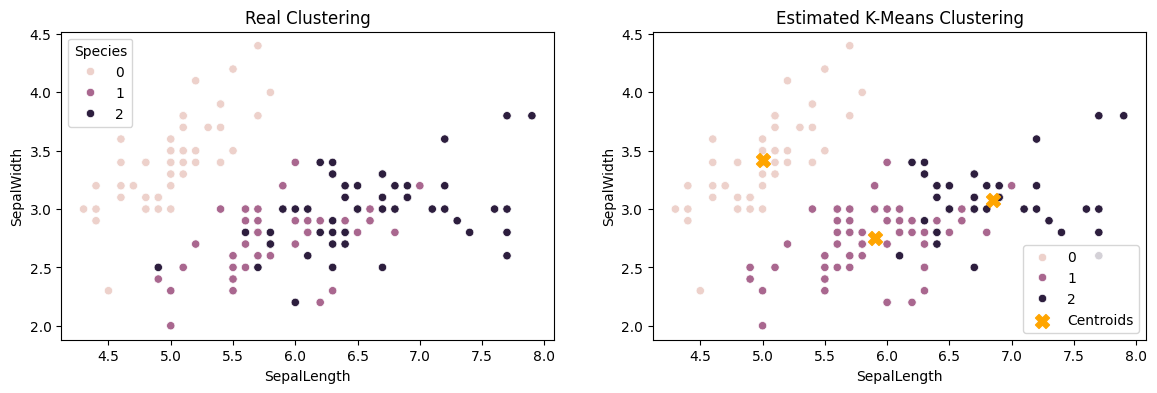

In [349]:
#Definir tamaños
plt.figure(figsize=(14, 4))

#Real cluster
plt.subplot(1, 2, 1)
plt.title('Real Clustering')
sns.scatterplot(data=df, x='SepalLength', y='SepalWidth', hue = 'Species')

#Estimated cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='SepalLength', y='SepalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 2], centroides[:, 3], s=100, c='orange', marker='X', label='Centroids')
plt.title('Estimated K-Means Clustering')
plt.legend()
plt.show()

# Kmeans clustering (K=4)

Kmeans clustering

In [350]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
cluster_num = 4

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=cluster_num, random_state=42, n_init=10)

# Print estimated cluster of each point in the dataset
estimated = kmeans.fit_predict(df[['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth']])
estimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [351]:
# Add a new column to the dataset with the cluster information
df["ClusterInfo"] = estimated
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ClusterInfo
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,3


In [352]:
# Manual pairing the labels of the real and estimated clusters
df[['Species', 'ClusterInfo']]

,Species,ClusterInfo
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,3
146,2,0
147,2,0
148,2,3


In [353]:
# Label of the estimated clusters
# 0 -> Setosa / 1 -> Versicolor / 2 -> Virginica
df['ClusterInfo'] = df['ClusterInfo'].map({0:1, 1:0, 2:2, 3:3})
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ClusterInfo
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,3


In [354]:
# Cluster centroides
centroides = kmeans.cluster_centers_
centroides

array([[4.815     , 1.625     , 6.2525    , 2.855     ],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [3.96071429, 1.22857143, 5.53214286, 2.63571429],
       [5.846875  , 2.13125   , 6.9125    , 3.1       ]])

In [355]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(sse)

57.317873214285726


In [356]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(iterations)

4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

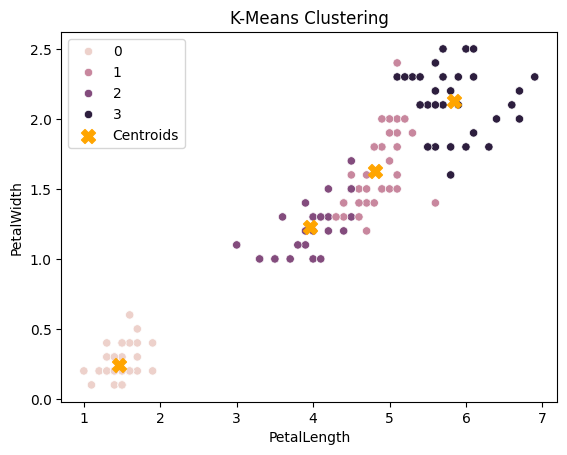

In [357]:
sns.scatterplot(x='PetalLength', y='PetalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='orange', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

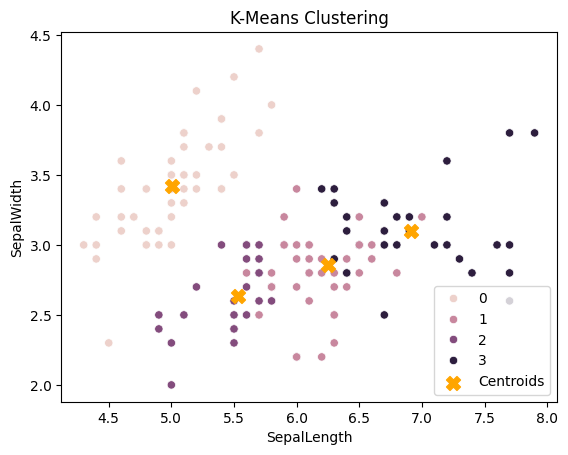

In [358]:
sns.scatterplot(x='SepalLength', y='SepalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 2], centroides[:, 3], s=100, c='orange', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

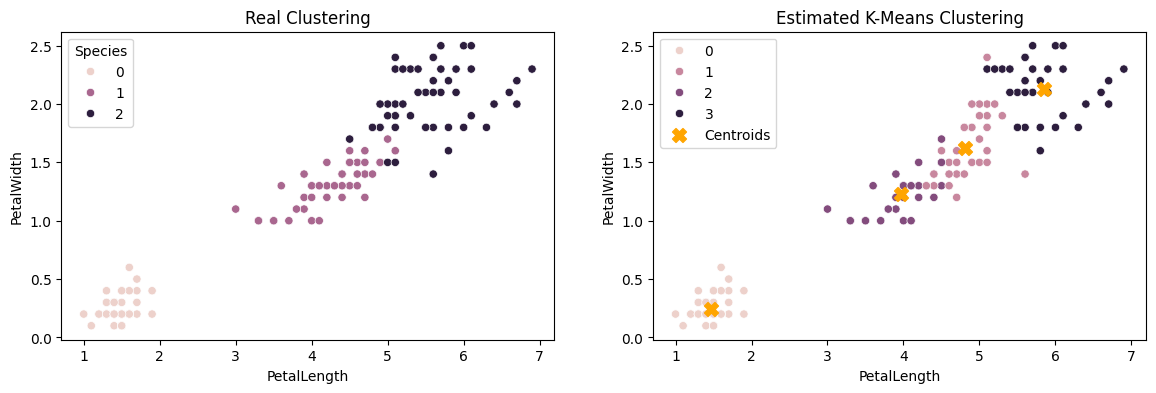

In [359]:
#Definir tamaños
plt.figure(figsize=(14, 4))

#Real cluster
plt.subplot(1, 2, 1)
plt.title('Real Clustering')
sns.scatterplot(data=df, x='PetalLength', y='PetalWidth', hue = 'Species')

#Estimated cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='PetalLength', y='PetalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='orange', marker='X', label='Centroids')
plt.title('Estimated K-Means Clustering')
plt.legend()
plt.show()

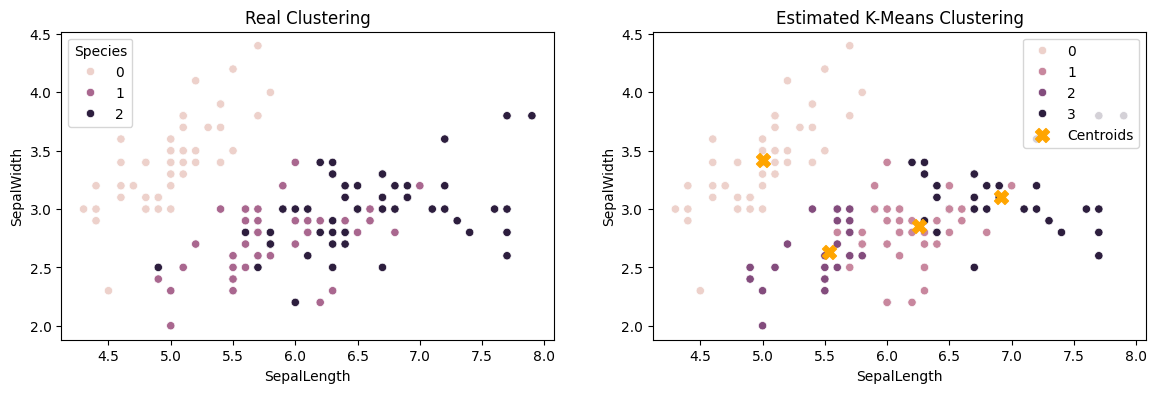

In [360]:
#Definir tamaños
plt.figure(figsize=(14, 4))

#Real cluster
plt.subplot(1, 2, 1)
plt.title('Real Clustering')
sns.scatterplot(data=df, x='SepalLength', y='SepalWidth', hue = 'Species')

#Estimated cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='SepalLength', y='SepalWidth', data=df, hue='ClusterInfo')
plt.scatter(centroides[:, 2], centroides[:, 3], s=100, c='orange', marker='X', label='Centroids')
plt.title('Estimated K-Means Clustering')
plt.legend()
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
The centroids appear at the center of the clusters, but the first cluster has much fewer points than the second, so it is unbalanced.

- Note that for K=3 ...
The amount of points is practically equal for each cluster. Moreover, the centroids appear in the center of each cluster. 3 clusters appears to be the most balanced approach.

- Note that for K=4 ...
The approach with four clusters is still balanced but it starts getting hard to differentiate one cluster from another.

Concluir

The best approach is the K=3 because it is balanced while maintaining separation between clusters.

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [370]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(1, 11)

# For each k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df[['PetalLength', 'PetalWidth','SepalLength', 'SepalWidth']])
    sse.append(km.inertia_)

<Axes: >

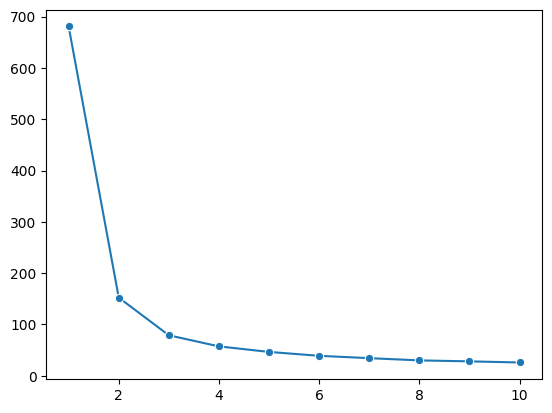

In [371]:
# Plot sse versus k
sns.lineplot(x=k_values, y=sse, marker='o')

Choose the k after which the sse is minimally reduced


After k = 3, the sse is minimally reduced.
The slope is more inclined from 2 to 3, and even more inclined from 1 to 2.
It is less inclined from 3 to the following values.
The optimal value is k =  3.

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k